# PARCIAL MODULO 2: REDES CONVOLUCIONALES.

El parcial tiene una parte teórica (Ver a continuación), y una práctica (Ver despues del bloque de codigo por completar). Contestelo en este mismo markdown y suba el archivo .ipynb con este formato de nombre: *Apellido_Nombre_P2.ipynb (Ejemplo: Bejarano_Isabel_P1.ipynb)*

### PARTE TEÓRICA (50 %)

1. (20 %) Tiene una imagen de tamaño 10 x 10 de un solo canal. Al aplicar una capa convolucional donde pasa 9 filtros 5x5, conteste: *i)* ¿Cuantas imagenes (canales) de salida tendría? *ii)* ¿Que tamaño tendria cada una de las imagenes de salida, usando un stride de 1 y sin padding? iii)* Con base en esto, cuantas entradas debe tener cada neurona de la primera capa de la red *fully-connected*?.

    *Respuesta:* i) Cada filtro produce una imagen de salida, del mapa de caracteristicas. Por lo que si hay 9 filtros, habrá 9   canales de salidas o imagenes en el que se le aplico ese filtro. ii) la fórmula que pude encontrar el Lab4 que envie fue  $$
\text{Output} = \frac{\text{Input} + 2 \cdot \text{Padding} - \text{KernelSize}}{\text{Stride}} + 1
$$

$$
\text{Output} = \frac{{10} +( 2 \cdot {0}) - \text{5}}{\text{1}} + 1
$$

$$
\text{Output} = 5 + 1
$$

$$
\text{Output} = 6
$$

Por lo que el tamaño de una imagen de salida usando un stride 1 es 6x6

iii) Si cada imagen de salida, de las capas convolucionales, tiene dimensiones 6x6 y son 9 filtros, seria 324 entradas por neurona en la primera capa.

2. (30 %) Para la misma imagen 10 x 10, con una capa convolucional y la siguiente *fully-connected*, calcule las entradas que debería tener cada neurona de la capa *fully-connected* para los siguientes casos: *i)* 3 filtros 2x2, con padding = 0 y stride = 2. *ii)* 4 filtros 3x3, con padding = 1 y stride = 3. *iii)* 4 filtros 3x3, con padding = 1, stride = 1, y un max-pooling 2x2 con stride =2.

    *Respuesta:* Siguiendo la formula que se tiene $$
\text{Output} = \frac{\text{Input} + 2 \cdot \text{Padding} - \text{KernelSize}}{\text{Stride}} + 1
$$

i) $$
\text{Output} = \frac{{10} +( 2 \cdot {0}) - \text{2}}{\text{2}} + 1
$$

$$
\text{Output} = 4 + 1
$$


$$
\text{Output} = 5
$$

Por lo que el tamaño de una imagen de salida usando un stride 2 es 5x5. Ahora bien, si son 3 filtros y se tiene por dimensiones en la imagen de salida 5x5, se tiene 75 entradas por neurona en la primera capa fully connected

ii)  $$
\text{Output} = \frac{\text{Input} + 2 \cdot \text{Padding} - \text{KernelSize}}{\text{Stride}} + 1
$$

$$
\text{Output} = \frac{{10} +( 2 \cdot {1}) - \text{3}}{\text{3}} + 1
$$

$$
\text{Output} = 3 + 1
$$

$$
\text{Output} = 4
$$

Por lo que el tamaño de una imagen de salida usando un stride 3 es 4x4. Ahora bien, si son 4 filtros y se tiene por dimensiones en la imagen de salida 4x4, se tiene 64 entradas por neurona en la primera capa fully connected

iii)  $$
\text{Output} = \frac{\text{Input} + 2 \cdot \text{Padding} - \text{KernelSize}}{\text{Stride}} + 1
$$

$$
\text{Output} = \frac{{10} +( 2 \cdot {1}) - \text{3}}{\text{1}} + 1
$$

$$
\text{Output} = 9 + 1
$$

$$
\text{Output} = 10
$$

Ahora como hay un maxpoling 2x2 con stride de 2, se tiene

$$
\text{Output} = \frac{{10} - \text{2}}{\text{2}} + 1
$$

$$
\text{Output} = 4 + 1
$$

$$
\text{Output} = 5
$$

Por lo que el tamaño de una imagen de salida usando un stride 1 es 5x5. Ahora bien, si son 4 filtros y se tiene por dimensiones en la imagen de salida 5x5, se tiene 100 entradas por neurona en la primera capa fully connected

### PARTE PRÁCTICA (50 %)

El siguiente código descarga un set de imagenes de *Modified National Institute of Standards and Technology database, MNIST*. Este set es de moda, y tiene imagenes en baja resolución de distintas prendas de vestir. Además, gráfica una imagen al azar por cada categoria, y muestra el total de imagenes y el total por categoría. 

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:16<00:00, 1.61MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 143kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:03<00:00, 1.19MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]



=== TRAIN DATA ===
Número total de imágenes: 60,000

T-shirt/top : 6000
Trouser     : 6000
Pullover    : 6000
Dress       : 6000
Coat        : 6000
Sandal      : 6000
Shirt       : 6000
Sneaker     : 6000
Bag         : 6000
Ankle boot  : 6000

=== TEST DATA ===
Número total de imágenes: 10,000

T-shirt/top : 1000
Trouser     : 1000
Pullover    : 1000
Dress       : 1000
Coat        : 1000
Sandal      : 1000
Shirt       : 1000
Sneaker     : 1000
Bag         : 1000
Ankle boot  : 1000


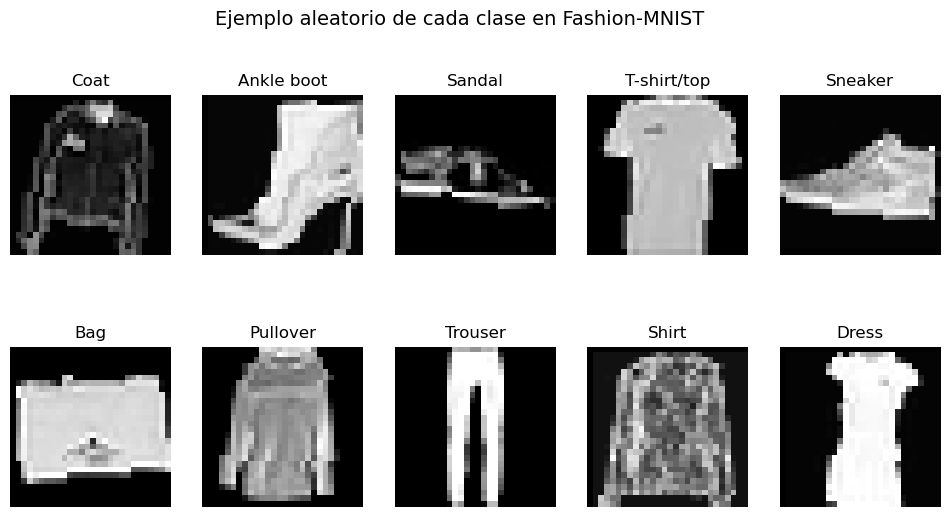

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torch.optim as optim
# =============================
# TRANSFORMACIONES
# =============================
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# =============================
# CARGA DE DATOS
# =============================
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform_train)
test_data  = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform_test)


# =============================
# CLASES Y CONTEO
# =============================
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def print_class_counts(dataset_name, targets):
     # Si targets no es tensor, lo convertimos solo en ese caso
    if not isinstance(targets, torch.Tensor):
        targets = torch.tensor(targets)
    counts = torch.bincount(targets)
    total = len(targets)
    print(f"\n=== {dataset_name.upper()} DATA ===")
    print(f"Número total de imágenes: {total:,}\n")
    for i, count in enumerate(counts):
        print(f"{class_names[i]:<12}: {count.item()}")

# Conteo para train y test por separado
print_class_counts("train", train_data.targets)
print_class_counts("test", test_data.targets)

# =============================
# MUESTRA ALEATORIA DE CADA CLASE
# =============================
samples = {}
indices = np.arange(len(train_data))
np.random.shuffle(indices)

for idx in indices:
    img, label = train_data[idx]
    if label not in samples:
        samples[label] = img
    if len(samples) == 10:
        break

plt.figure(figsize=(12, 6))
for i, (label, img) in enumerate(samples.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

plt.suptitle("Ejemplo aleatorio de cada clase en Fashion-MNIST", fontsize=14)
plt.show()




1. (30 %) Para la red convolucional propuesta, complete el número de entradas que debe tener la capa *fully-connected* (Esta en un valor de 9999), escriba aca este valor, corra el modelo diga si converge y comente cuanto es el accuracy (*Ayuda: Revise el tamaño de sus imagenes de entrada en el batch: print("Tamaño del batch de imágenes:", images.shape)*).

    *Respuesta:* El valor de entradas para la red original que se tiene es de 7*7*16, es decir, 784 entradas, esto tambien lo comente en el codigo, no convergio y el accuracy final fue de Evaluación final - Loss: 0.3453 | Accuracy: 87.18%


Usando dispositivo: cpu
Total de batches (train): 469
Total de batches (test): 79
Tamaño del batch de imágenes: torch.Size([128, 1, 28, 28])
Epoch [1/10] - Loss: 0.8799 | Accuracy: 67.51%
Epoch [2/10] - Loss: 0.6278 | Accuracy: 76.71%
Epoch [3/10] - Loss: 0.5744 | Accuracy: 78.86%
Epoch [4/10] - Loss: 0.5399 | Accuracy: 80.28%
Epoch [5/10] - Loss: 0.5093 | Accuracy: 81.42%
Epoch [6/10] - Loss: 0.4955 | Accuracy: 82.03%
Epoch [7/10] - Loss: 0.4804 | Accuracy: 82.56%
Epoch [8/10] - Loss: 0.4649 | Accuracy: 83.16%
Epoch [9/10] - Loss: 0.4549 | Accuracy: 83.31%
Epoch [10/10] - Loss: 0.4511 | Accuracy: 83.81%

Evaluación final - Loss: 0.3453 | Accuracy: 87.18%


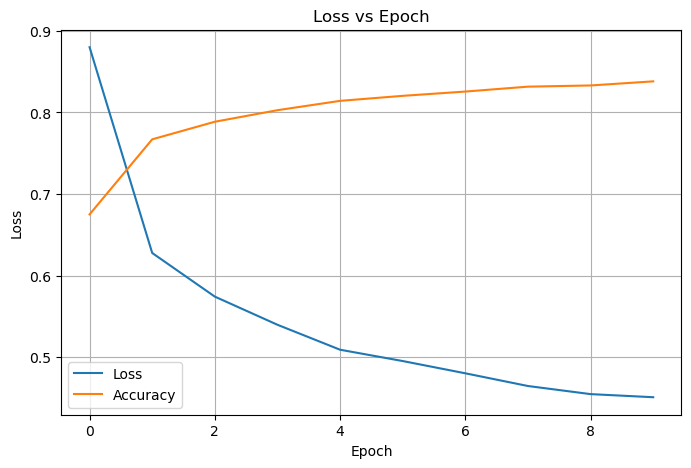

In [3]:
# =============================
# CONFIGURAR DISPOSITIVO (CPU o GPU)// Importante: Debe tener Python menor a 3.13, y instalar torch con CUDA para poder usar la GPU.
# =============================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# =============================
# DATA LOADERS (sin recargar datos)
# =============================
batch_size = 128  # puedes ajustar según tu GPU o CPU

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Verificación rápida de tamaños
print(f"Total de batches (train): {len(train_loader)}")
print(f"Total de batches (test): {len(test_loader)}")

# Ver un batch para inspeccionar forma y tipo de datos (Tamaño de la imagen)
for images, labels in train_loader:
    print("Tamaño del batch de imágenes:", images.shape) #Estructura de tipo: [N imagenes en batch, N canales, alto, ancho]
    break  # solo queremos ver el primer batch

# =============================
# MODELO CNN liviano para FashionMNIST #Al usarase las imagenes del dataset de Fashion torch.Size([128, 1, 28, 28]), 
#se tiene una imágen de entrada 28*28*1
# =============================
conv_model = nn.Sequential( 
    nn.Conv2d(1, 8, kernel_size=3, padding=1),   #La salida de 8 filtros con tamaño 3x3, y un stride por defecto de 1,
                                                    #y padding 1 es 28*28*8
    nn.ReLU(),
    nn.MaxPool2d(2),   #Solo se divide entre 2  14*14*8                          

    nn.Conv2d(8, 16, kernel_size=3, padding=1),  #La salida es 14*14*16
    nn.ReLU(),
    nn.MaxPool2d(2),                             # Se divide en 2  7*7*16
                           
    nn.Flatten(),
    #COMPLETAR
    nn.Linear(784, 128), #Aqui se observa que se tiene 784 entradas
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10)                           # 10 clases en FashionMNIST
).to(device)

# =============================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =============================

def train(model, loader, loss_fn, optimizer, epochs=20, device='cpu'):
    model.train()
    history = []

    for epoch in range(epochs):
        total_loss = 0.0
        correct = 0
        total = 0

        for images, labels in loader:
            # Mover batch a GPU
            images, labels = images.to(device), labels.to(device)

            # Forward
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Métricas
            total_loss += loss.item() * images.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / len(loader.dataset)
        acc = correct / total
        history.append((avg_loss, acc))

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f} | Accuracy: {acc*100:.2f}%")

    return history


def evaluate(model, loader, loss_fn, device='cpu'):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item() * images.size(0)

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)

    return avg_loss, acc

# =============================
# ENTRENAMIENTO Y EVALUACIÓN
# =============================
# Definir pérdida y optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_model.parameters(), lr=0.001,weight_decay=0.001)

# Entrenar
history = train(conv_model, train_loader, loss_fn, optimizer, epochs=10, device=device)

# Evaluar
test_loss, test_acc = evaluate(conv_model, test_loader, loss_fn, device=device)
print(f"\nEvaluación final - Loss: {test_loss:.4f} | Accuracy: {test_acc*100:.2f}%")

##Gráfico convergencia
plt.figure(figsize=(8,5))
plt.plot(history,label=["Loss","Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

3. (20 %) Cambie su red convolucional, manteniendo los pools, por las siguientes filtros: 4 filtros 3x3 con padding = 1 -> 8 filtros 3x3 con padding = 1. Reporte el número de entradas que debe tener cada neurona de su red *fully connected*, asegurese que haya convergencia, y compare el *accuracy* con la red del punto anterior.

    *Respuesta:* Se tendria 392 de entradas que debe tener cada neurona en la red del fully connected, Para aumentar la convergencia, incremente el batch_size a 256, el numero de epocas a 15 y el learning rate a 0.003, con esto llego a convergencia al final de las epocas y tuvo un accuracy de 87.35%, esto se puede observar por las unidades de los ejes que poseen mas unidades. Esto principal se debio tanto a que el aumento del learning rate permitió que el Adam actualizara los pesos más rápido, reduciendo la pérdida con mayor eficiencia durante las primeras épocas. Asimismo, el incremento del batch size estabilizó los gradientes y redujo la varianza en las actualizaciones, lo cual ayudó al entrenamiento. Y por ultmo, el numero de filtros del modelo fue más liviano y alcanzó su punto óptimo más rápidamente. Al igual que por las epocas ya que aumentar el numero de las epocas, al contrastarlo con el codigo original impacto en el loss y el accuracy.

Usando dispositivo: cpu
Total de batches (train): 235
Total de batches (test): 40


C:\Users\john2\anaconda3\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Tamaño del batch de imágenes: torch.Size([256, 1, 28, 28])
Epoch [1/15] - Loss: 0.7426 | Accuracy: 72.69%
Epoch [2/15] - Loss: 0.5474 | Accuracy: 79.83%
Epoch [3/15] - Loss: 0.5191 | Accuracy: 80.84%
Epoch [4/15] - Loss: 0.4959 | Accuracy: 81.70%
Epoch [5/15] - Loss: 0.4810 | Accuracy: 82.36%
Epoch [6/15] - Loss: 0.4720 | Accuracy: 82.65%
Epoch [7/15] - Loss: 0.4638 | Accuracy: 82.87%
Epoch [8/15] - Loss: 0.4636 | Accuracy: 83.06%
Epoch [9/15] - Loss: 0.4523 | Accuracy: 83.32%
Epoch [10/15] - Loss: 0.4533 | Accuracy: 83.43%
Epoch [11/15] - Loss: 0.4490 | Accuracy: 83.61%
Epoch [12/15] - Loss: 0.4451 | Accuracy: 83.62%
Epoch [13/15] - Loss: 0.4439 | Accuracy: 83.66%
Epoch [14/15] - Loss: 0.4364 | Accuracy: 83.95%
Epoch [15/15] - Loss: 0.4386 | Accuracy: 83.85%

Evaluación final - Loss: 0.3364 | Accuracy: 87.35%


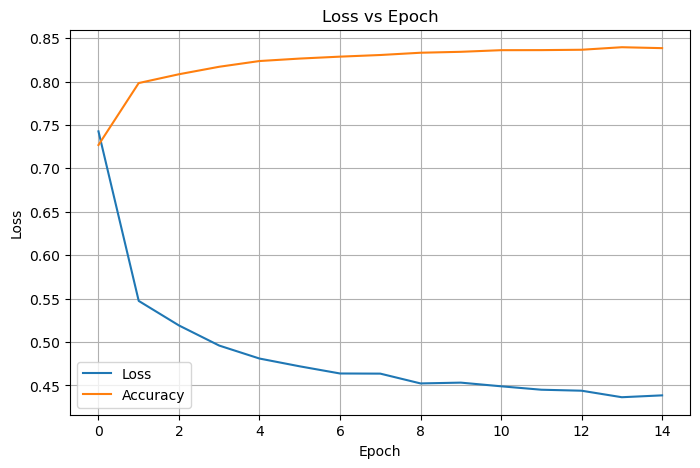

In [6]:
# =============================
# CONFIGURAR DISPOSITIVO (CPU o GPU)// Importante: Debe tener Python menor a 3.13, y instalar torch con CUDA para poder usar la GPU.
# =============================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

# =============================
# DATA LOADERS (sin recargar datos)
# =============================
batch_size = 256  # puedes ajustar según tu GPU o CPU

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Verificación rápida de tamaños
print(f"Total de batches (train): {len(train_loader)}")
print(f"Total de batches (test): {len(test_loader)}")

# Ver un batch para inspeccionar forma y tipo de datos (Tamaño de la imagen)
for images, labels in train_loader:
    print("Tamaño del batch de imágenes:", images.shape) #Estructura de tipo: [N imagenes en batch, N canales, alto, ancho]
    break  # solo queremos ver el primer batch

# =============================
# MODELO CNN liviano para FashionMNIST #Al usarase las imagenes del dataset de Fashion torch.Size([128, 1, 28, 28]), 
                                       #se tiene una imágen de entrada 28*28*1
# =============================
conv_model = nn.Sequential(
    nn.Conv2d(1, 4, kernel_size=3, padding=1),   #La salida de 4 filtros con tamaño 3x3 y padding 1, con un stride de 1, es 28*28*4
    nn.ReLU(),
    nn.MaxPool2d(2),                     # Se divide entre 2 queda 14*14*4        

    nn.Conv2d(4, 8, kernel_size=3, padding=1),   #La salida con 8 filtros seria 14*14*8
    nn.ReLU(),
    nn.MaxPool2d(2),                             #Se divide ente 2 y queda 7*7*8
                           
    nn.Flatten(),
    #COMPLETAR
    nn.Linear(392, 128),            #Al final el modelo tiene 392 entradas para la primera fully connected
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10)                           # 10 clases en FashionMNIST
).to(device)

# =============================
# FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN
# =============================

def train(model, loader, loss_fn, optimizer, epochs=20, device='cpu'):
    model.train()
    history = []

    for epoch in range(epochs):
        total_loss = 0.0
        correct = 0
        total = 0

        for images, labels in loader:
            # Mover batch a GPU
            images, labels = images.to(device), labels.to(device)

            # Forward
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Métricas
            total_loss += loss.item() * images.size(0)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / len(loader.dataset)
        acc = correct / total
        history.append((avg_loss, acc))

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f} | Accuracy: {acc*100:.2f}%")

    return history


def evaluate(model, loader, loss_fn, device='cpu'):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item() * images.size(0)

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)

    return avg_loss, acc

# =============================
# ENTRENAMIENTO Y EVALUACIÓN
# =============================
# Definir pérdida y optimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_model.parameters(), lr=0.003,weight_decay=0.001)

# Entrenar
history = train(conv_model, train_loader, loss_fn, optimizer, epochs=15, device=device)

# Evaluar
test_loss, test_acc = evaluate(conv_model, test_loader, loss_fn, device=device)
print(f"\nEvaluación final - Loss: {test_loss:.4f} | Accuracy: {test_acc*100:.2f}%")

##Gráfico convergencia
plt.figure(figsize=(8,5))
plt.plot(history,label=["Loss","Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Gracias por ver todo el codigo :P